### Exploratory Data Analysis (EDA)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dp_mobile_money_dataset.csv")

data.head()

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,TRANSFER,19824.96,4537027967639631,187712.18,167887.22,4875702729424478,8.31,19833.27,1
1,0,PAYMENT,598.97,4296267625767470,8.92,8.92,25-0000401,0.00,0.00,0
2,0,PAYMENT,545.85,4178224023847746,93.60,-452.25,13-0001587,0.00,545.85,0
3,0,TRANSFER,19847.01,4178224023847746,-452.25,-20299.26,4096920916696293,4011.72,23858.74,1
4,0,PAYMENT,546.89,4779013371563747,159148.76,158601.88,75-0003564,0.00,546.89,0


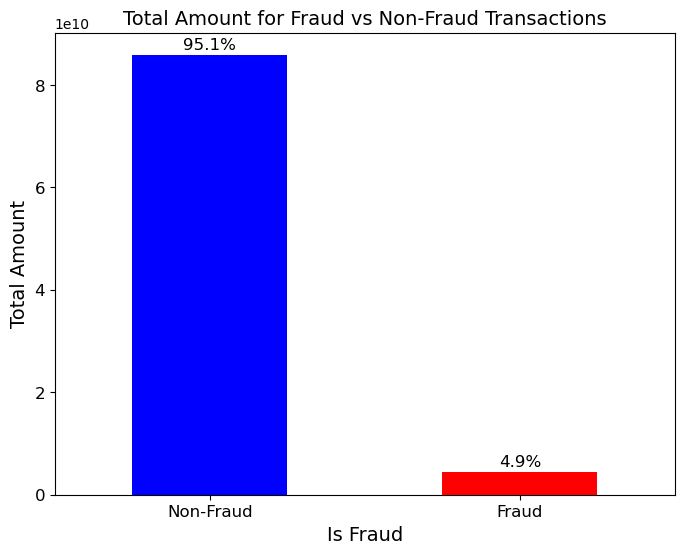

In [16]:
fraud_sums = data.groupby('isFraud')['amount'].sum()

colors = ['blue', 'red']

# Plotting
ax = fraud_sums.plot(kind='bar', figsize=(8, 6), color=colors)
plt.title('Total Amount for Fraud vs Non-Fraud Transactions', fontsize=14)  
plt.ylabel('Total Amount', fontsize=14)  
plt.xlabel('Is Fraud', fontsize=14)  
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)

ax.tick_params(axis='both', which='major', labelsize=12)

# Calculating and annotating percentages
total = fraud_sums.sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.005 * total
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)  
plt.show()

In [17]:
data.describe()

,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06
mean,6.555529e+01,5.253868e+04,4.499952e+15,2.433758e+06,2.443880e+06,1.085083e+05,1.222772e+05,1.020346e-01
std,4.467368e+01,8.835650e+04,2.896351e+14,1.307615e+06,1.297181e+06,2.830138e+05,3.192277e+05,3.026939e-01
min,0.000000e+00,2.400000e-01,4.000062e+15,-1.999971e+05,-1.999971e+05,-1.983685e+05,-1.357280e+05,0.000000e+00
25%,2.300000e+01,6.064600e+02,4.248762e+15,1.577186e+06,1.600496e+06,1.606423e+04,2.496233e+04,0.000000e+00
50%,5.400000e+01,1.729825e+04,4.508521e+15,2.619827e+06,2.625680e+06,6.313018e+04,7.448161e+04,0.000000e+00
75%,1.060000e+02,7.116149e+04,4.750928e+15,3.361338e+06,3.361872e+06,1.373822e+05,1.431702e+05,0.000000e+00
max,1.430000e+02,2.142928e+06,4.999855e+15,1.224469e+07,1.224469e+07,1.188554e+07,1.206621e+07,1.000000e+00


In [18]:
print(data.describe())


               step        amount     initiator  oldBalInitiator  \
count  1.720181e+06  1.720181e+06  1.720181e+06     1.720181e+06   
mean   6.555529e+01  5.253868e+04  4.499952e+15     2.433758e+06   
std    4.467368e+01  8.835650e+04  2.896351e+14     1.307615e+06   
min    0.000000e+00  2.400000e-01  4.000062e+15    -1.999971e+05   
25%    2.300000e+01  6.064600e+02  4.248762e+15     1.577186e+06   
50%    5.400000e+01  1.729825e+04  4.508521e+15     2.619827e+06   
75%    1.060000e+02  7.116149e+04  4.750928e+15     3.361338e+06   
max    1.430000e+02  2.142928e+06  4.999855e+15     1.224469e+07   

       newBalInitiator  oldBalRecipient  newBalRecipient       isFraud  
count     1.720181e+06     1.720181e+06     1.720181e+06  1.720181e+06  
mean      2.443880e+06     1.085083e+05     1.222772e+05  1.020346e-01  
std       1.297181e+06     2.830138e+05     3.192277e+05  3.026939e-01  
min      -1.999971e+05    -1.983685e+05    -1.357280e+05  0.000000e+00  
25%       1.600496e+06

In [19]:
null_counts = data.isnull().sum()
print(null_counts)


step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


In [20]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)


step               0.0
transactionType    0.0
amount             0.0
initiator          0.0
oldBalInitiator    0.0
newBalInitiator    0.0
recipient          0.0
oldBalRecipient    0.0
newBalRecipient    0.0
isFraud            0.0
dtype: float64
